In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [61]:
conda install scikit-learn

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [62]:
#magic cells
!pip install scikit-learn

In [66]:
conda install kagglehub

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [68]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krupadharamshi/bostonhousing")

print("Path to dataset files:", path)

Path to dataset files: /Users/midwayjona/.cache/kagglehub/datasets/krupadharamshi/bostonhousing/versions/1


### Cargamos Datos

In [69]:
dataset = pd.read_csv('BostonHousing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


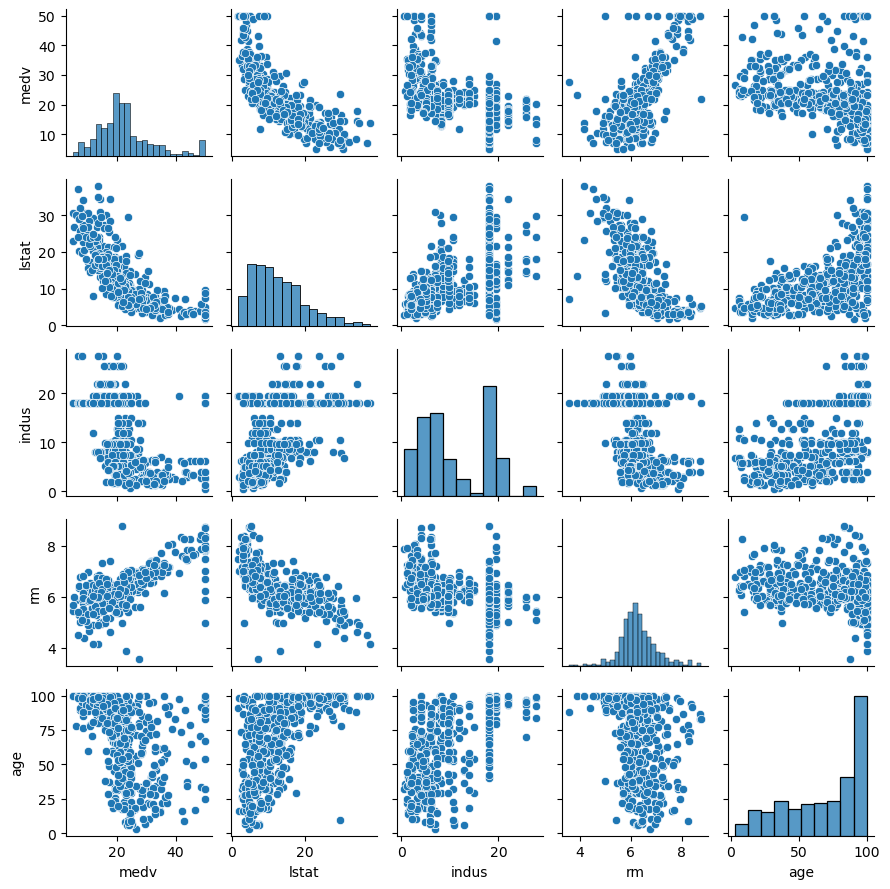

In [70]:
cols= ['medv', 'lstat', 'indus', 'rm', 'age']
sns.pairplot(dataset[cols], palette='coolwarm', height=1.8)
plt.tight_layout()

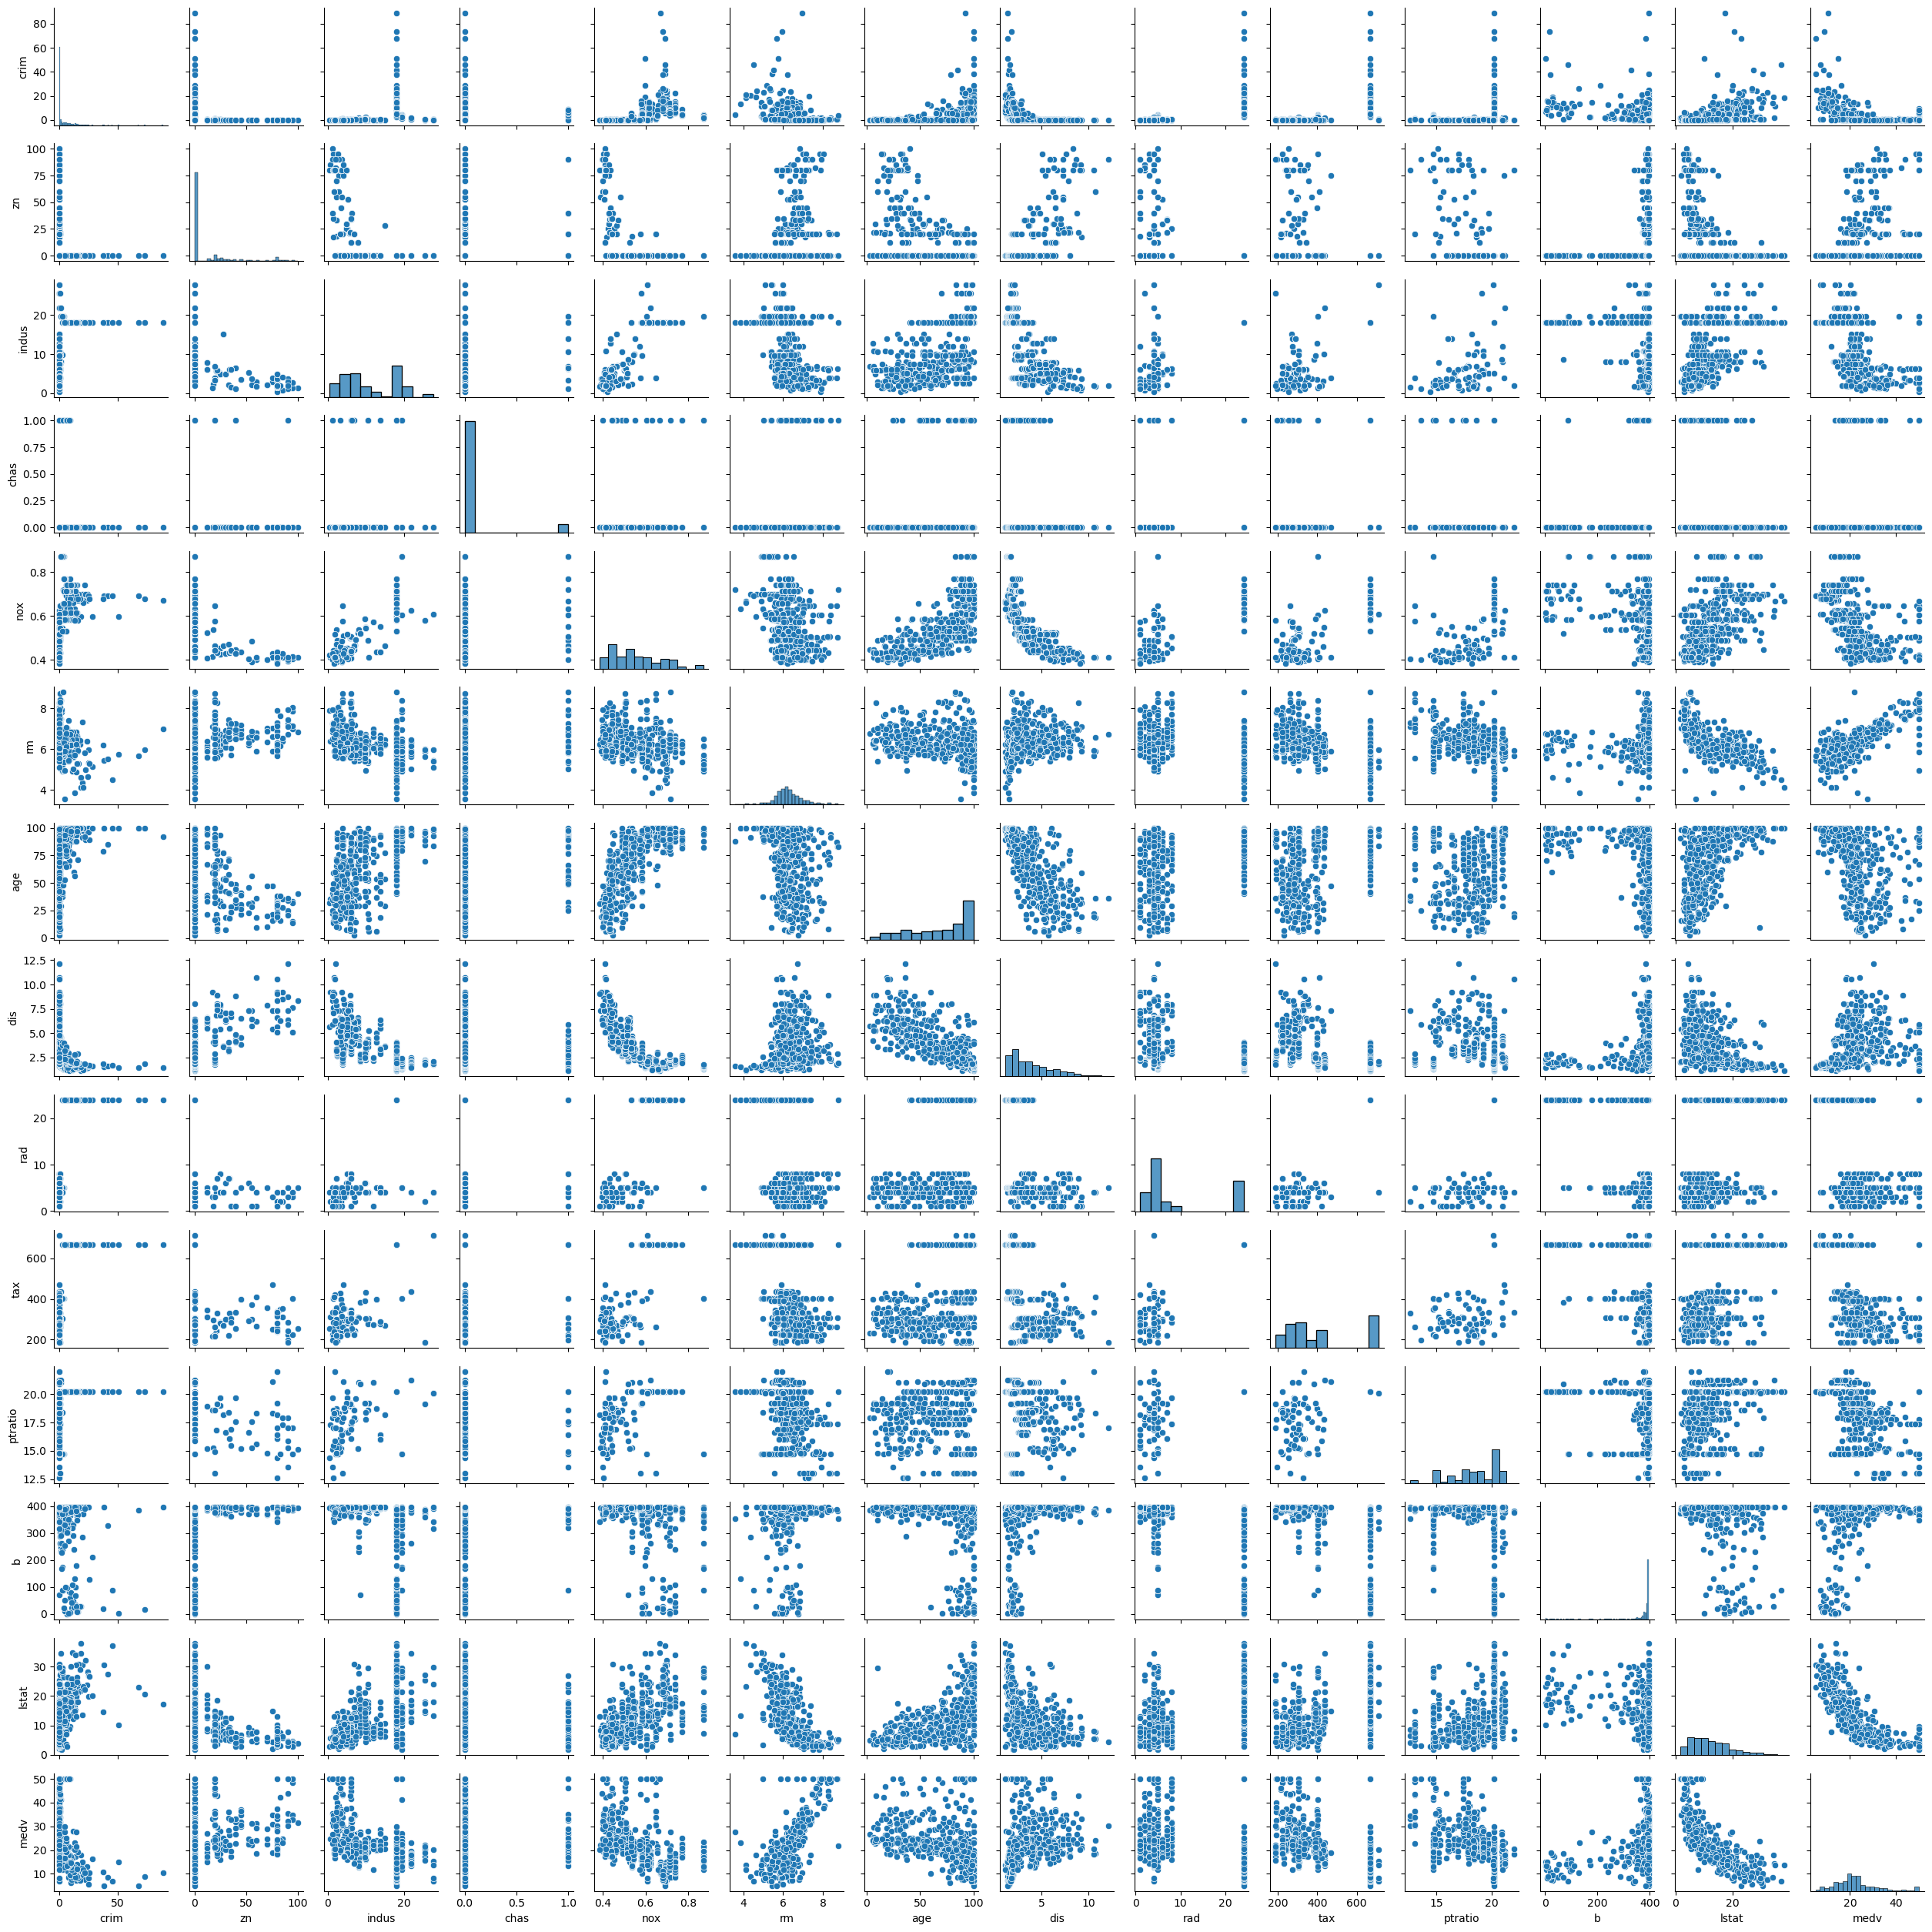

In [71]:
cols= ['medv', 'lstat', 'indus', 'rm', 'age']
sns.pairplot(dataset, palette='coolwarm', height=1.8)
plt.tight_layout()
plt.savefig("paitplot.png") # save as png

### Analisis de Correlacion

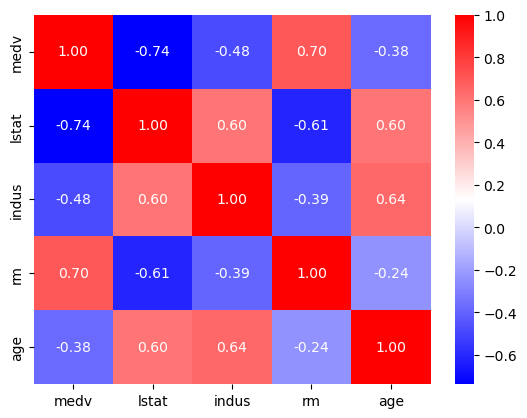

In [72]:
sns.heatmap(dataset[cols].corr(), annot=True, fmt='.2f', cmap='bwr')
plt.show()

### Modelo de Regresion Lineal

In [77]:
X = dataset.drop(labels='medv', axis=1) # extract features
Y = dataset['medv'] # extract target

In [78]:
lr_model = LinearRegression() # create model
lr_model.fit(X, Y)

LinearRegression()

In [80]:
list(zip(X.columns, lr_model.coef_))

[('crim', -0.10801135783679648),
 ('zn', 0.04642045836688019),
 ('indus', 0.020558626367071613),
 ('chas', 2.686733819344906),
 ('nox', -17.766611228299976),
 ('rm', 3.80986520680923),
 ('age', 0.0006922246403424178),
 ('dis', -1.4755668456002553),
 ('rad', 0.30604947898516965),
 ('tax', -0.012334593916574328),
 ('ptratio', -0.9527472317072853),
 ('b', 0.009311683273793721),
 ('lstat', -0.5247583778554863)]

In [81]:
('b0', lr_model.intercept_)

('b0', 36.45948838508981)

### Realizamos Predicciones

In [82]:
lr_model_preds = lr_model.predict(X)
lr_model_preds

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

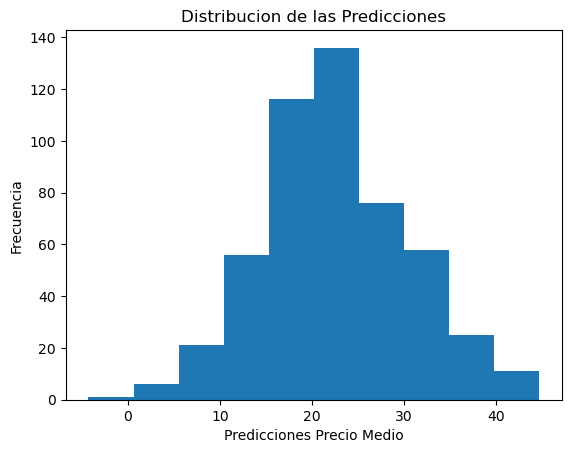

In [84]:
plt.hist(lr_model_preds)
plt.xlabel("Predicciones Precio Medio")
plt.ylabel("Frecuencia")
plt.title("Distribucion de las Predicciones")
plt.show()

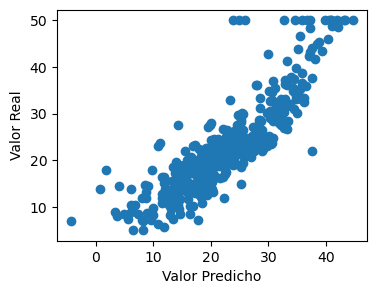

In [85]:
plt.figure(figsize=(4,3))
plt.scatter(lr_model_preds, Y)
plt.xlabel("Valor Predicho")
plt.ylabel("Valor Real")
plt.show()

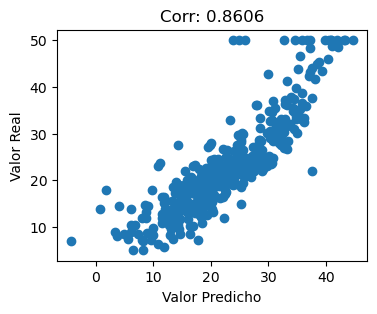

In [90]:
corr_coef_preds_true =  round(np.corrcoef(lr_model_preds, Y)[0,1], 4)

plt.figure(figsize=(4,3))
plt.scatter(lr_model_preds, Y)
plt.xlabel("Valor Predicho")
plt.ylabel("Valor Real")
plt.title(f"Corr: {corr_coef_preds_true}")
plt.show()

### R2

In [91]:
r2 = r2_score(Y, lr_model_preds)
print("Coeficiente de Determinacion: {:.4}".format(r2))

Coeficiente de Determinacion: 0.7406


In [95]:
np.power(corr_coef_preds_true, 2)

0.7406323600000001

### Split train-test

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2025)

In [112]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8,344.91,15.76
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67
93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
149,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15
222,0.62356,0.0,6.20,1,0.507,6.879,77.7,3.2721,8,307,17.4,390.39,9.93


In [117]:
lr_model = LinearRegression()
lr_scores = np.abs(cross_val_score(lr_model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))

print(f'RMSE Final: {np.mean(lr_scores)}')

RMSE Final: 4.770672252418992


In [118]:
y_train_max = np.max(y_train)

In [119]:
y_train_min = np.min(y_train)

In [120]:
np.mean(lr_scores)/(y_train_max - y_train_min)

0.10601493894264426

In [121]:
### RandomForestRegressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_scores = np.abs(cross_val_score(rfr_model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))

print(f'RMSE Random Forest Regressor: {np.round(np.mean(rfr_scores), 4)}')

RMSE Random Forest Regressor: 3.5182


In [125]:
np.mean(rfr_scores)/(y_train_max - y_train_min)

0.07818154782299334

### Re-train de Modelo de Random Forest Regressor

In [127]:
rfr_final_model = RandomForestRegressor().fit(X_train, y_train)
rfr_predictions = rfr_final_model.predict(X_test)
rfr_predictions

array([12.974, 35.139, 21.829, 38.635, 24.585, 22.144, 19.094, 32.076,
       32.938, 11.394, 17.868, 23.429, 22.009, 20.339, 12.557, 18.079,
        8.506, 33.633, 13.493, 21.248, 35.164, 17.92 ,  8.691, 27.255,
       21.528, 30.919, 15.001, 14.082, 20.261, 33.97 , 20.885, 20.629,
       19.986, 23.173, 14.326, 23.402, 17.851, 13.046, 17.273, 21.364,
       17.063, 44.858, 20.84 , 21.676, 23.962, 15.774, 31.669, 14.462,
       28.597, 28.217, 22.052, 20.627, 24.269, 25.937, 28.576, 18.315,
       20.522, 31.06 , 13.918, 23.778, 13.431, 19.503, 18.074, 25.123,
        8.802, 15.814, 20.443, 18.176, 19.675, 15.727, 23.759, 23.16 ,
       21.708, 23.066, 21.261, 44.034, 16.978, 32.383, 26.372,  8.65 ,
       21.731, 20.503, 30.18 , 35.05 , 33.165, 17.047, 14.758, 14.467,
       44.425, 46.178,  9.366, 12.946, 22.915, 21.155, 34.358, 45.327,
       13.492, 20.197, 22.111, 24.336,  8.763, 39.303])

In [129]:
np.mean(np.abs(y_test - rfr_predictions))

2.4277549019607836

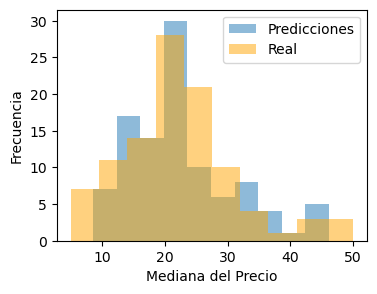

In [134]:
plt.figure(figsize=(4,3))
plt.hist(rfr_predictions, alpha=0.5, label='Predicciones')
plt.hist(y_test, color='orange', alpha=0.5, label='Real')
plt.xlabel('Mediana del Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

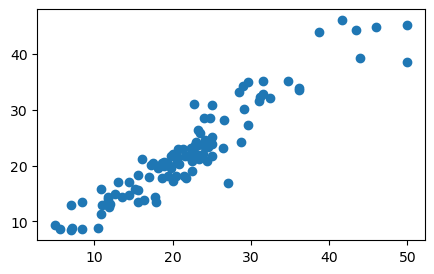

In [136]:
plt.figure(figsize=(5,3))
plt.scatter(y_test, rfr_predictions)
plt.show()